### Pruebas ola (v2)

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
import soundfile 
from utils.wav_utils import read_wav, save_wav 

import ola 
from pytsmod import olatsm
#from test import plotting 

from test import test_objective as TO, test_subjective as TS, plotting  


Observacion:
tamaño de ventana en segundos: w_size = N/fs

Para fs = 44100

algunos casos:
Si N = 441 -> w_size = 10 ms

Si N = 882 -> w_size = 20 ms

Si N = 1024 -> w_size = 23 ms

Si N = 2048 -> w_size = 46 ms

Si N = 4096 -> w_size = 92 ms

Si N = 8192 -> w_size = 184 ms

#### ALGUNAS PRUEBAS INICIALES SUBJETIVAS. 

Comparando audios reales (.wav) modificados con la libreria de referencia
pytsmod y con la nuestra.

#### CASO 1:

Audio: 'piano_cerca.wav' mono, 48k, 5 seg (armonico)

Probamos variando el alpha, el N de la ventana y manteniendo un Hs=N//2

In [2]:
#lectura de audio
fs = 48000
piano_cerca, _ = read_wav('audios/piano_cerca.wav', fs)

#pytsmod version
pianocerca_refe= olatsm.ola(piano_cerca, .5, win_type='hann', win_size=512, syn_hop_size=512//2)

#nuestra version
pianocerca_ours = ola.TSM_OLA(piano_cerca, 512, .5, 512//2)

In [3]:
#Escucho señal modificada by pystmod
Audio(pianocerca_refe, rate=48000)


In [4]:
#Escucho señal modificada por nuestro code
Audio(pianocerca_ours, rate=48000)

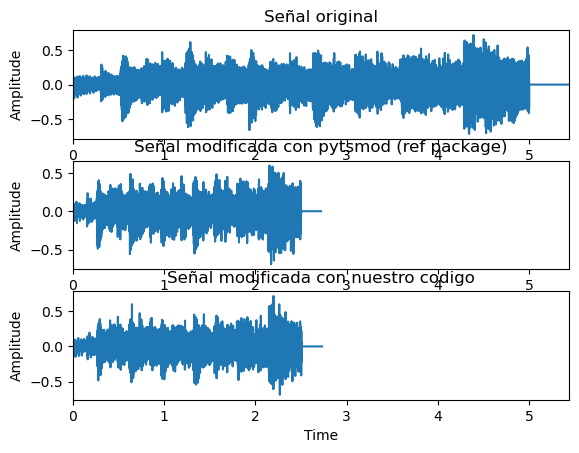

In [5]:
#Grafiquemos

plotting.basic_3plot(piano_cerca,pianocerca_refe,pianocerca_ours,48000)


##### OBSERVACIONES:

En terminos generales, funciona de manera similar en comparacion con la libreria propuesta de referencia.

Se puede notar la distorsion causada por el proceso de TSM OLA en esta señal armonica, como fue detallado en la bibliografia.

Para N = 1024 o 512 da optimos resultados, lo que se condice con los papers. Si disminuimos mucho el tamaño de la ventana modifica bastante el pitch, y si lo aumentamos da muchas modulaciones en amplitud.

#### CASO 2:

Audio: 'techno_perc.wav' estereo (lo convertimos a dual mono), 44.1k, 8 seg (percusivo).

Probamos variando el alpha, el N de la ventana y manteniendo un Hs=N//2

In [24]:
#lectura de audio
fs = 44100
perc, _ = read_wav('audios/perc.wav', fs)
drums, _ = read_wav('audios/drumloop1.wav', fs)

#pytsmod version
drums_tsmrefe= olatsm.ola(drums, .2, win_type='hann', win_size=1024, syn_hop_size=1024//2)

#nuestra version
drums_tsm_untref = ola.TSM_OLA(drums, 1024, .2, 1024//2)

 

In [25]:
#Escucho señal modificada by pystmod
Audio(drums_tsmrefe, rate=44100) 

In [26]:
#Escucho señal modificada por nuestro code
Audio(drums_tsm_untref, rate=44100)

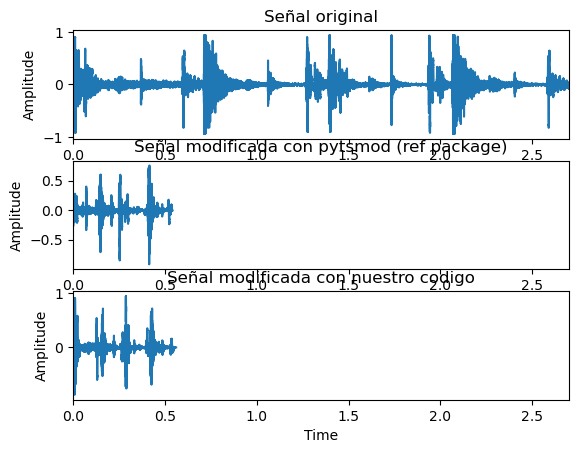

In [27]:
#Grafiquemos

plotting.basic_3plot(drums,drums_tsmrefe,drums_tsm_untref,48000)

##### OBSERVACIONES:

Como en el caso 1, funciona de manera similar en comparacion con la libreria propuesta de referencia.

Se puede notar una mejor percepcion sonora en cuanto al TSM aplicado, para valores de alfa no muy extremos, comprendidos entre 0.6 y 1.5 aproximadamente. A medida que la modificacion de escala se vuelve mas extrema, se comienza a notar mas pero igual perceptualmente no pareceria grave, dada la simplicidad del algoritmo. Hay que evaluar hasta que limites de alpha tiene sentido en la aplicacion.

Para N = 1024 o 512 da buenos resultados, lo que se condice con los papers. 
Si aumentamos mucho el tamaño de la ventana comienza a hacerse notorio el artefacto de 'transient doubling' descripto en la bibliografia.
Si reducimos el tamaño de la ventana por debajo de 512, lo que seria menor a 10ms para fs de 44100 o 48000, en la version de referencia funciona y pareceria reducir el cambio de pitch. En nuestro codigo, no compila y tira error de dimensiones al efectuar el tsm. (habria que revisar)

Pero en terminos generales, se puede efectuar para valores de ventanas de N=512 y N=1024.

A continuacion, podemos proceder a realizar PRUEBAS OBJETIVAS sobre el rendimiento del algoritmo, en comparacion con señales simples ideales, y sus modificaciones de duracion ideales, sin ninguna variacion de pitch.

#### PRUEBAS INICIALES OBJETIVAS

En esta sección se busca analizar como varia el algorítmo antes distintos casos de interes y bajo distintos parámetros.
Como el procedimiento de TSM con OLA es relativamente simple, el parametro mas critico a la hora de ejecutarlo es el tamaño de la ventana N. 
En los diccionarios se deja constancia de los distintos tipos de configuración probadas bajo estos test.

In [29]:
alpha = 2.5
cfg1 = {"N": 8192, "Hs": 8192//4, "alpha": alpha, "fs": 22050}
cfg2 = {"N": 8192, "Hs": 8192//2, "alpha": alpha, "fs": 22050}
cfg3 = {"N": 4096, "Hs": 4096//2, "alpha": alpha, "fs": 22050}
cfg4 = {"N": 4096, "Hs": 4096//4, "alpha": alpha, "fs": 22050}
cfg5 = {"N": 4096, "Hs": 4096//6, "alpha": alpha, "fs": 22050}
cfg6 = {"N": 2048, "Hs": 2048//4, "alpha": alpha, "fs": 22050}
cfg7 = {"N": 2048, "Hs": 2048//6, "alpha": alpha, "fs": 22050}
cfg8 = {"N": 1024, "Hs": 1024//2, "alpha": alpha, "fs": 22050}
cfg9 = {"N": 512, "Hs": 512//2, "alpha": alpha, "fs": 22050}

El primer test compara señales ideales respeto a un caso base de interes particular para cada algorítmo. En el primer test se usará una señal senoidal. Primero se muestra un ejemplo con una frequencia arbitraria y luego se realiza el mismo analisis para cada frequencia.

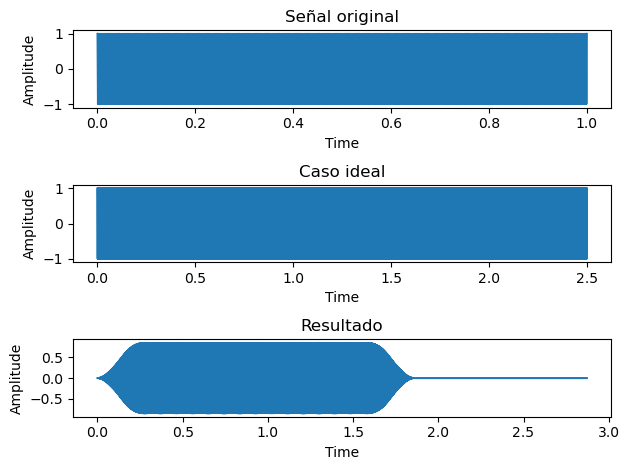

In [33]:

f_analysis = 500
config = cfg1 
algorithm = "OLA"
x_base, x_ideal, x_result = TO.test_ideal_signal(algo=algorithm, f0=f_analysis, plot=True, audio_save=False, return_audios=True, **config)


#### Observaciones:

Al graficar de este modo toda la duracion del audio, se puede detallar claramente como es el efecto sobre la amplitud de la señal modificada temporalmente.

Se puede notar como, bajo el metodo OLA no se ve afectada la amplitud en la duracion de la señal, como si es en el caso del pv, pero se nota un estilo de 'fade in' y 'fade out' en el inicio y fin respectivamente.

Para ventanas cortas (512) no es considerable, pero si aumentamos, como vemos en la config1 (ventana de 8192), alli es demasiado critico. Aunque, de todas formas ese largo de ventana no seria utilizado en la practica. 

Tambien se ve la influencia de sumar un +N en el largo de vector de salida y en el algoritmo de OLA. Esto fue agregado porque se consideraron largos de ventana cortos, y corregia errores de dimensiones al efectuar la reubicacion temporal de la señal en la salida. Para ventanas cortas ese +N no es considerable, pero para ventanas largas si. (Que como se dijo previamente, no serian utilizadas en la practica).